In [15]:
!pip install imgaug mtcnn -q

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mtcnn import MTCNN
from skimage import transform as tf

In [21]:
BASE_PATH = '/kaggle/input/bill-gates-images/cropped/'

In [47]:
def align_face(image):
    detector = MTCNN()
    results = detector.detect_faces(image)

    if len(results) == 0:
        raise ValueError("No face detected in the image.")

    keypoints = results[0]['keypoints']
    left_eye = tuple(map(int, keypoints['left_eye']))  # Convert to tuple of integers
    right_eye = tuple(map(int, keypoints['right_eye']))  # Convert to tuple of integers

    print(f"Left eye: {left_eye}, Right eye: {right_eye}")  # Debug: Check eye coordinates
    
    # Calculate the angle between the two eyes
    dY = right_eye[1] - left_eye[1]
    dX = right_eye[0] - left_eye[0]
    angle = np.degrees(np.arctan2(dY, dX))

    print(f"Angle: {angle}")  # Debug: Check calculated angle
    
    # Get the center between the two eyes
    eyes_center = (int((left_eye[0] + right_eye[0]) // 2), int((left_eye[1] + right_eye[1]) // 2))
    print(f"Eyes center: {eyes_center}")  # Debug: Check eyes center

    # Calculate the affine transformation matrix for face alignment
    M = cv2.getRotationMatrix2D(eyes_center, angle, scale=1.0)
    (h, w) = image.shape[:2]
    aligned_image = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC)
    
    return aligned_image

# Function to apply single transformations
def apply_transformations(image):
    transformations = [
        ("rotate_20", tf.AffineTransform(rotation=np.deg2rad(5))),
        ("rotate_-20", tf.AffineTransform(rotation=np.deg2rad(-5))),
        ("vertical_tilt_10", tf.AffineTransform(shear=np.deg2rad(10))),
        ("vertical_tilt_-10", tf.AffineTransform(shear=np.deg2rad(-10))),
        # You can add more transformations here like horizontal tilt, etc.
    ]
    
    augmented_images = {}
    
    for name, tform in transformations:
        transformed_image = tf.warp(image, tform, mode='wrap')
        augmented_images[name] = (transformed_image * 255).astype(np.uint8)  # Convert to uint8
    
    return augmented_images

# Function to display images
def display_images(images):
    plt.figure(figsize=(12, 12))
    for i, (name, img) in enumerate(images.items()):
        plt.subplot(2, 2, i+1)
        plt.imshow(img)
        plt.title(name)
        plt.axis('off')
    plt.show()

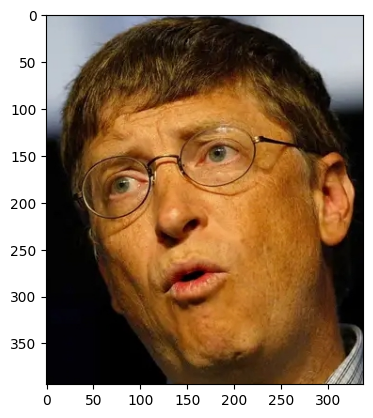

In [48]:
# Path to your image
image_path = f"{BASE_PATH}9.jpg"

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
plt.imshow(image)
plt.show()

Left eye: (86, 181), Right eye: (183, 152)
Angle: -16.645038214675942
Eyes center: (134, 166)


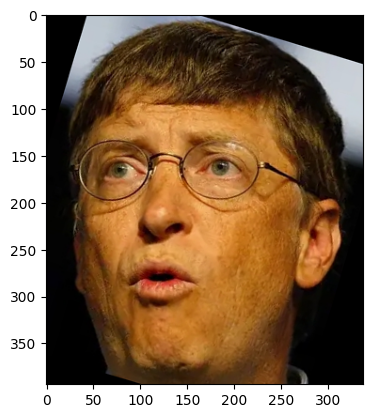

In [49]:
# Step 1: Align the face to 0 degrees
aligned_face = align_face(image)
plt.imshow(aligned_face)
plt.show()

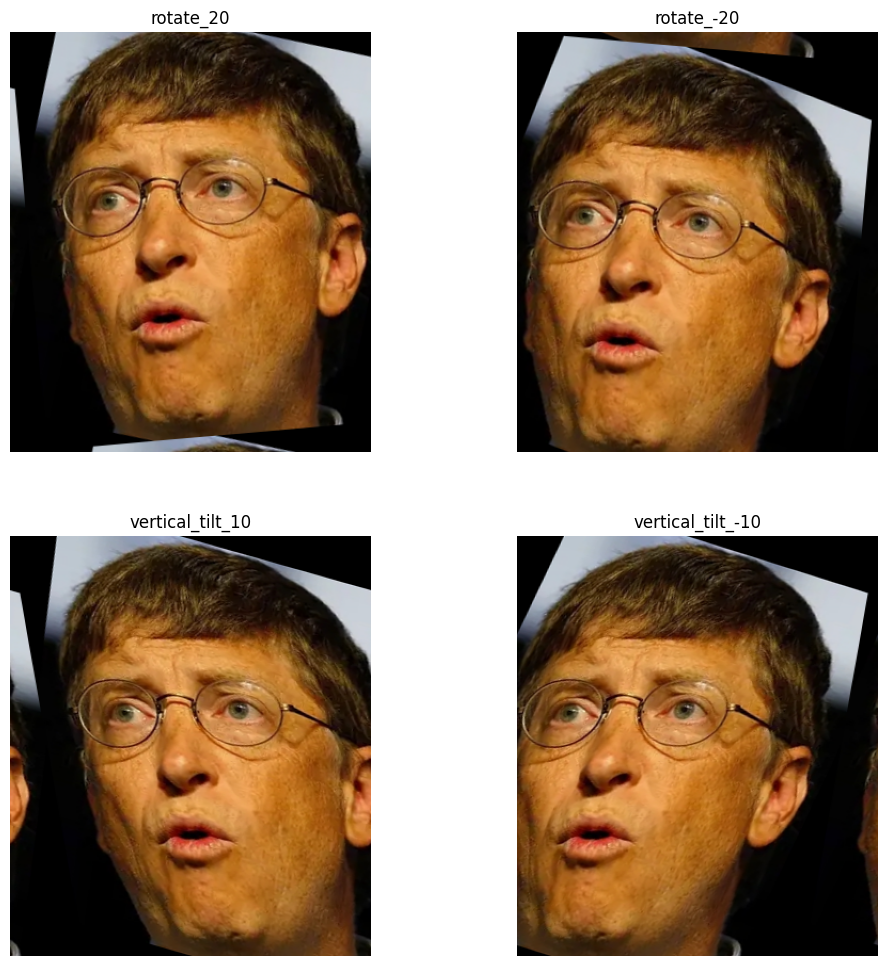

In [50]:
# Step 2: Apply augmentations one by one (e.g., rotate, tilt, etc.)
augmented_images = apply_transformations(aligned_face)

# Step 3: Display augmented images
display_images(augmented_images)